<a href="https://colab.research.google.com/github/sweta8144/Internship-Goeduhub/blob/main/Task13(Goeduhub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task - 13**


**Name - Sweta Lenka**

**Reg no - GO_STP_11510**

Exploratory Data Analysis (EDA) of Titanic Survival Problem.

To do the same we will use the Pandas, Seaborn and Matplotlib library.

Dataset contains the details of the passengers who had boarded the ship.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.Age.isna().any()

False

In [9]:
np.random.seed(42)
df['Cabin'].fillna(np.random.choice(['A','B','C','D']),inplace=True)
df.Cabin.isna().any()

False

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


In [14]:
survived = df.groupby('Survived')['Survived'].count()
survived

Survived
0    549
1    340
Name: Survived, dtype: int64

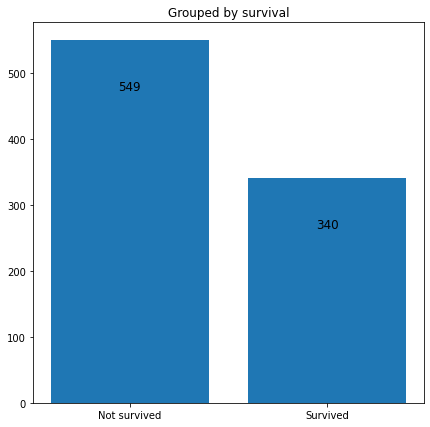

In [15]:
plt.figure(figsize=(7,7))
plt.bar(survived.index, survived.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived.values):
    plt.text(i, value-70, str(value), fontsize=12, color='black',
             horizontalalignment='center', verticalalignment='center')

In [16]:
survived_sex = df.groupby('Sex')['Survived'].sum()
survived_sex

Sex
female    231
male      109
Name: Survived, dtype: int64

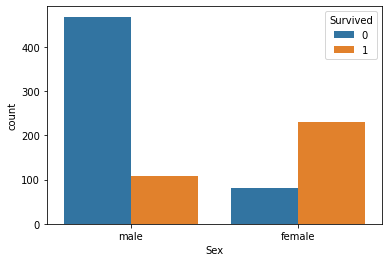

In [17]:
sns.countplot(x='Sex',hue='Survived', data=df);

In [18]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64

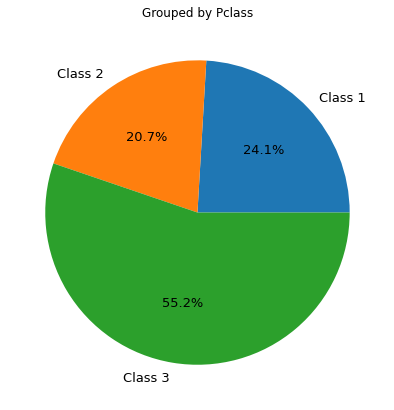

In [19]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [20]:
embarked_count = df.groupby('Embarked')['Embarked'].count()
embarked_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

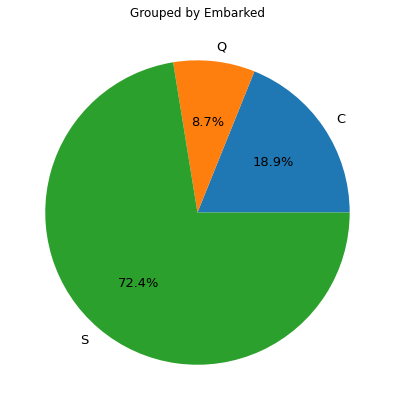

In [21]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Embarked')
plt.pie(embarked_count.values, labels=['C', 'Q', 'S'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [22]:
ages = df[df['Age'].notnull()]['Age'].values
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 397, 166,  89,  48,  18,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

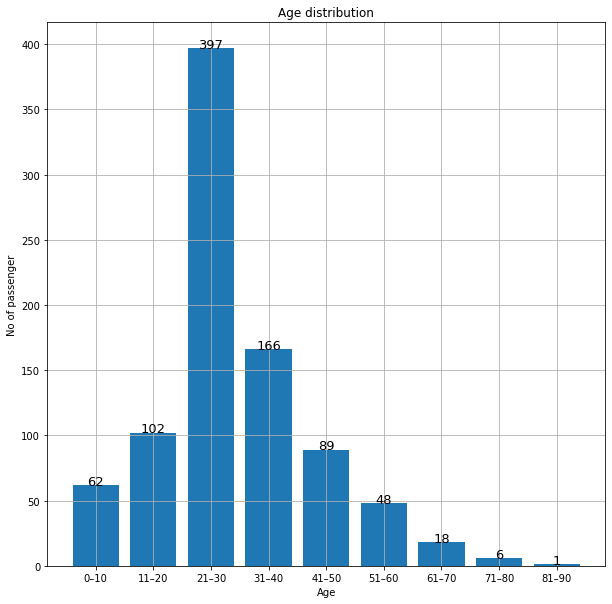

In [23]:
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']
plt.figure(figsize=(10,10))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=13,
             horizontalalignment='center', verticalalignment='center')
plt.grid()    
plt.show()

In [25]:
def take_initial(x):
    return x[0]

cabins = df['Cabin'].dropna()
cabins = cabins.apply(take_initial)
cabins_count = cabins.value_counts()
cabins_count

C    746
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

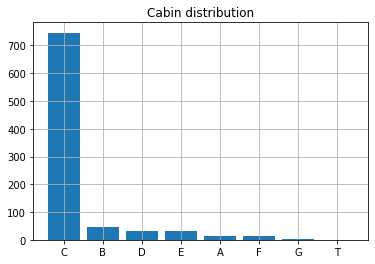

In [26]:
plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.grid()
plt.show()

In [27]:
fare_count = df.groupby('Fare')['Fare'].count()
fare_count

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 247, dtype: int64

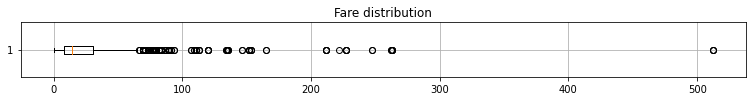

In [28]:
plt.figure(figsize=(13,1))
plt.title('Fare distribution')
plt.boxplot(df['Fare'], vert=False)
plt.grid()
plt.show()